## Predicting Boston Housing 

The dataset for this project originates from [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 feature for homes from various suburbs in Boston, Massachusettes. For the purpose of this project, the following preprocessing steps have been made to the dataset. 

* 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
* 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
* The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
* The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

In [20]:
 # Importing required Libraries for the project 

import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Importing supplementary visualisations code 

import visuals as vs

# Pretty display for notebook

%matplotlib inline

In [21]:
# Loadin Boston Housing Data

data = pd.read_csv('housing.csv')
print(data.head())
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)


      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Making a cursory investigation about the Boston housing data and providing observations. I will first start with the statistics of the data set in order the get more comfortable and learn from the data. 

In [22]:
# Minimum price of the data 
minimum_price = data['MEDV'].min(0)

# Maximum prive of the data
maximum_price = data['MEDV'].max()

# Mean Price of the data 
mean_price = data['MEDV'].mean()

# Median price of the data
median_price = data['MEDV'].median()

# Standard deviation of prices of the data 
std_price = data['MEDV'].std()

print 'Statistics for the Boston Housing Dataset'
print 'Minimum price: ${:,.2f}'.format(minimum_price)
print 'Maximum price: ${:,.2f}'.format(maximum_price)
print 'Mean price: ${:,.2f}'.format(mean_price)
print 'Median price: ${:,.2f}'.format(median_price)
print 'Standard Deviation of prices: ${:,.2f}'.format(std_price)

# We could have get the same statistics outcome by using pythons .decscribe() argumennt. 



Statistics for the Boston Housing Dataset
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard Deviation of prices: $165,340.28


## Some Observatoins 

I will use some basic scatterplot to see any relationship in variables. 



In [23]:
# Importing plotly for creating scatterplots 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='borgausifo', api_key='nMiM4QfnSUGXd9VegD6L')

# Create Trace

trace_1 = go.Scatter(x = data['RM'], y = data['MEDV'], mode = 'markers')
data_2 = [trace]

# Plot and embed in ipython notebook!

py.iplot(data_2, filename='basic-scatter_RM')



Above graph shows us there is some positive relationship between home prices and average number of homes!!! 

In [24]:
trace_2 = go.Scatter(x = data['LSTAT'], y = data['MEDV'], mode = 'markers')
data_3 = [trace_2]
py.iplot(data_3, filename='basic-scatter_LSTAT')

Above Graph shows us there is negative relationship between home prices and neioghborhood !!! 

In [25]:
trace_3 = go.Scatter(x = data['PTRATIO'], y = data['MEDV'], mode = 'markers')
data_4 = [trace_3]
py.iplot(data_4, filename='basic-scatter_PTRATIO')

It is hard to tell any relationship between home prices and ratio of students to teacher in primary and secondary schools inn the neighborhood. 

## Developing a Model 

In this section I will develop tool and techniques necessary for a model to make predictions. 

#### Implementation : Defining a Performance Metric

I will be calculating the [coefficient of determination](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R2, to quantify model's performance. It's a useful statistic in regression analysis, as it often describe how 'good' that model is at making predictions. 

* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.




In [26]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score



In [27]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### Implementation: Shuffle and Split Data 

I will be splitting the data into training and testing subsets. Also i will shuffle the dataset to remove any biasing in the ordering of the dataset. 


In [28]:
# Importing sklearn train_test_split for shuffle and split 

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 6)

print "Training and testing split was successful" 


Training and testing split was successful


## Analyzing Model Performance 

### Learning Curves 

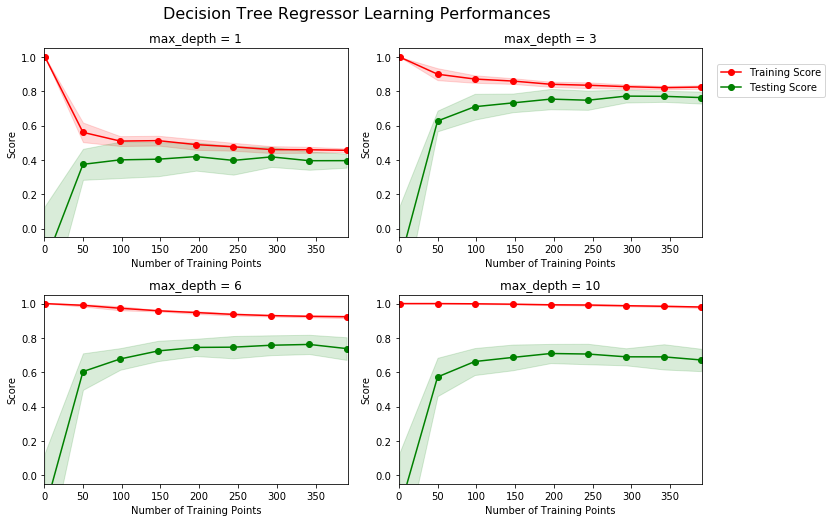

In [29]:
# Producing Learning Curve 

vs.ModelLearning(features, prices)

I'd choose max_depth = 3 

#### Training Data Vs Testing Data

As we can see that we are doing really good job with training data when we have small size of data points when we introduce new data points we can see that our error is increasing but at the same time our testing error is decreasing. 

#### More Data 

We can see that adding more that will not gonna have any effect on testing and training data.

##  Complexity Curve Performance 

The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function 

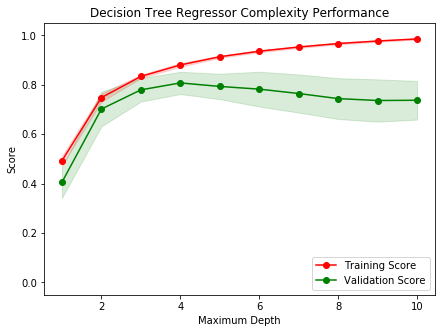

In [30]:
# Creating Complexity Curves 

vs.ModelComplexity(X_train, y_train)

* As we can see that our model suffers from high variance when we have depth size of 1 and it suffers from high bias when our depth goes to 10 and more. Because our model seems to be overfits the data and/or memorizes the data when the depth is increasing. Our best depth is around 3. 

## Implementation of Fitting the Model


In [31]:
# Importing required tools!!!

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    # Create cross-validation sets from the training data
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    
    # Creating a decision tree regressor object 
    
    regressor = DecisionTreeRegressor()
    
    # Creating a dictionary for the parameters 'max_depth' with a range 1 to 10
    
    params = {'max_depth':list(range(1, 11))}
    
    # Transforming 'performance_metric' into scoring funcgion using 'make_scorer'
    
    scoring_func = make_scorer(performance_metric)
    
    # Create a Grid search object
    
    grid = GridSearchCV(regressor, params, scoring = scoring_func, cv = cv_sets)
    
    # FIt the grid search object to the data to compute the optimal model 
    
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    
    return grid.best_estimator_ 



In [32]:
# Fit the training data to the model using grid search 

reg = fit_model(X_train, y_train)

# Producing the value of max_depth 

print 'Paramater max_depth is {} for the optimal model'.format(reg.get_params()['max_depth'])

Paramater max_depth is 4 for the optimal model


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [33]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $399,663.16
Predicted selling price for Client 2's home: $238,132.08
Predicted selling price for Client 3's home: $896,962.50


In [44]:
from plotly import tools

fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig['layout'].update(height=600, width=600, title='Subplots')
py.iplot(fig, filename='simple-subplot')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



##### Price Recommendations for clients 
* For the Client 1 - 399,663.16
* For the Client 2 - 238,132.08
* For the Client 3 - 896,962.50

##### Statistical Exploration Prices 
* Min : 105,000
* Max : 1,024,800.00
* Mean : 454,342.94
* Median : 438,900.00
* Standard Deviation : 165,340.28


###### For the Client 1 (399,663.00):
As we can see from our data exploration our room numbers has positive effect on home prices and class ratio has negative effect on home prices. Our predicted price seems to reasonable as we can see from our data exploration it falls into the area of 5 bedroom home prices. 


###### For the Client 2 (238,132.08):

This price still the reasonable. It is little more than one standard deviation below the mean. This home should be the lowest priced because it is smallest number of rooms, it in bottom 45 %, and it has ratio on studen t the teacher. So our predictions reflects a okay value. 


###### For the Client 3 (896,962.50): 

This home has the most rooms, located in best neighboorhood, and student the teacher ratio is also the lowest. It should have the highest value as our model reflects it is little lower than the maximum value in home prices. 







###  Sensitivity 

In [46]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
